In [11]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from text_processing_functions import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Twitter

In [14]:
mypath = "."
folder_name='Twitter Data/Cleaned Data'
file_path = f'{mypath}/{folder_name}/'
files = [filename for filename in os.listdir(file_path) if filename.endswith('.csv')]
files

['safe_distancing.csv',
 'safe_entry.csv',
 'circuit_breaker.csv',
 'panic_buying.csv',
 'Tracetogether.csv',
 'stay_home_notice.csv',
 'vaccination.csv',
 'covid-19.csv']

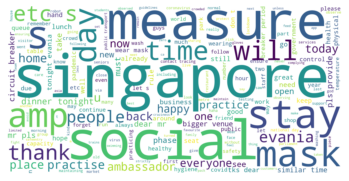

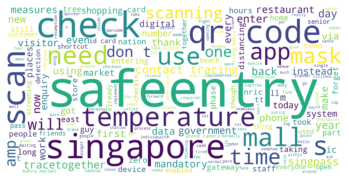

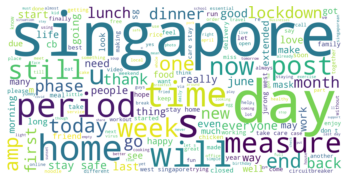

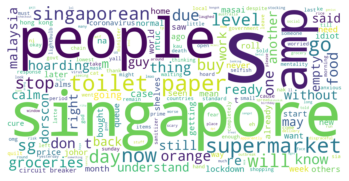

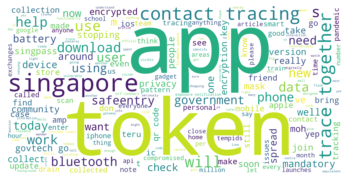

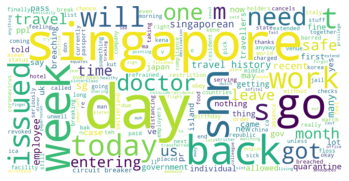

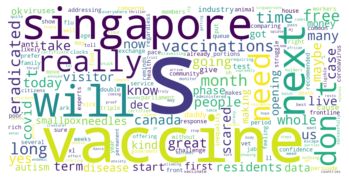

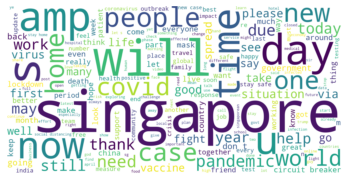

In [16]:
for file in files:
    tweets = pd.read_csv(f'{file_path}{file}') 

    key_words = file[:-4].split('_')
    stop_words = set(STOPWORDS)
    stop_words.update(key_words)

    cleaned_text = []
    for i in range(len(tweets)):
        text = tweets.iloc[i]['tweet']

        # removing mentions, hashtags, URLs from tweet
        text = re.sub(r"(?:\@|\#|https?\://)\S+", "", text)
        #removing emoji
        text = remove_emoji(text)

        text_tokenize = word_tokenize(text)
        text_lower = [w.lower() for w in text_tokenize]
        text_words_only = [w for w in text_lower if re.search('^[a-z]+$',w)]

        text_joined = " ".join(text_words_only)

        cleaned_text.append(text_joined)

    all_tweets = " ".join(row for row in cleaned_text)

    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=2000, height=1000).generate(all_tweets)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    # wordcloud.to_file("enjoyable_comp.png")